In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [38]:
import keras

In [39]:
#Part 1
from keras.models import Sequential

In [53]:
from keras.layers import Dense

In [40]:
from keras.layers import Convolution2D

In [41]:
from keras.layers import MaxPooling2D

In [42]:
from keras.layers import Flatten

In [43]:
from keras.preprocessing.image import ImageDataGenerator,load_img

In [44]:
from keras import backend as K

In [45]:
print(os.listdir(r"C:\Users\dell\Desktop\Machine Learning\CHESTXRAYDataset"))
print(os.listdir(r"C:\Users\dell\Desktop\Machine Learning\CHESTXRAYDataset\train"))
print(os.listdir(r"C:\Users\dell\Desktop\Machine Learning\CHESTXRAYDataset\test"))


['test', 'train']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


NORMAL


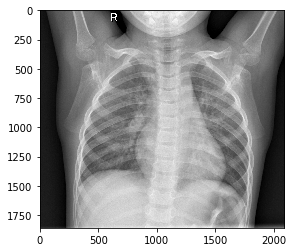

In [46]:
img_name="IM-0115-0001.jpeg"
img_normal=load_img(r"C:\\Users\\dell\\Desktop\\Machine Learning\\CHESTXRAYDataset\\train\\NORMAL\\"+img_name)

print("NORMAL")
plt.imshow(img_normal)
plt.show()

PNEUMONIA


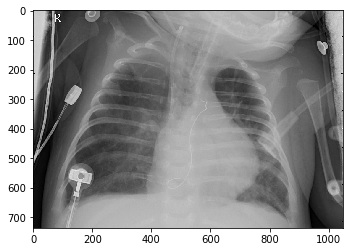

In [62]:
img_name="person63_bacteria_306.jpeg"
img_normal=load_img(r"C:\\Users\\dell\\Desktop\\Machine Learning\\CHESTXRAYDataset\\train\\PNEUMONIA\\"+img_name)

print("PNEUMONIA")
plt.imshow(img_normal)
plt.show()

In [47]:
#Initiating the CNN - Creating Model
model=Sequential()

In [48]:
#Step- 1 Convolution
model.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [49]:
#Step- 2 MaxPooling
model.add(MaxPooling2D(pool_size=(2,2)))

In [51]:
#Add Another Convolution Layer for to Improve the Performance
model.add(Convolution2D(32,3,3,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [52]:
#Step- 3 Flattening
model.add(Flatten())

In [54]:
#Step- 4 Full Connection
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [55]:
#Compling the CNN
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [56]:
#Part2- Fitting the CNN To the Images

In [57]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [58]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [59]:
training_set=train_datagen.flow_from_directory(r"C:\\Users\\dell\\Desktop\\Machine Learning\\CHESTXRAYDataset\\train",target_size=(64,64),batch_size=32,class_mode="binary")

Found 5216 images belonging to 2 classes.


In [60]:
test_set=test_datagen.flow_from_directory(r"C:\\Users\\dell\\Desktop\\Machine Learning\\CHESTXRAYDataset\\test",target_size=(64,64),batch_size=32,class_mode="binary")

Found 624 images belonging to 2 classes.


In [61]:
model.fit_generator(training_set,samples_per_epoch=5216,nb_epoch=25,validation_data=test_set,nb_val_samples=624)

Epoch 1/25
163/163 [==============================] - 698s 4s/step - loss: 0.3746 - acc: 0.8336 - val_loss: 0.4896 - val_acc: 0.7625
Epoch 2/25
163/163 [==============================] - 609s 4s/step - loss: 0.2271 - acc: 0.9076 - val_loss: 0.4745 - val_acc: 0.7967
Epoch 3/25
163/163 [==============================] - 600s 4s/step - loss: 0.2100 - acc: 0.9158 - val_loss: 0.3369 - val_acc: 0.8651
Epoch 4/25
163/163 [==============================] - 10217s 63s/step - loss: 0.1851 - acc: 0.9254 - val_loss: 0.3337 - val_acc: 0.8700
Epoch 5/25
163/163 [==============================] - 8196s 50s/step - loss: 0.1767 - acc: 0.9294 - val_loss: 0.3753 - val_acc: 0.8367
Epoch 6/25
163/163 [==============================] - 4463s 27s/step - loss: 0.1783 - acc: 0.9298 - val_loss: 0.2735 - val_acc: 0.8909
Epoch 7/25
163/163 [==============================] - 847s 5s/step - loss: 0.1548 - acc: 0.9402 - val_loss: 0.2555 - val_acc: 0.9153
Epoch 8/25
163/163 [==============================] - 801s 5s/

In [63]:
model.save_weights('CHEST.h5')

In [68]:
import numpy as np
from keras.preprocessing import image

In [85]:
query_img=image.load_img("E:\\person11_virus_38.jpeg",target_size=(64,64))

In [86]:
query_img=image.img_to_array(query_img)

In [87]:
query_img=np.expand_dims(query_img,axis=0)

In [88]:
result=model.predict(query_img)

In [89]:
print(training_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [90]:
if result[0][0]==1:
    print("PNEUMONIA")
elif result[0][0]==0:
    print("NORMAL")

PNEUMONIA


In [91]:
model.save("CHESTMODEL")

In [92]:
#For to Open Saved Model
#model1=keras.models.load_model("mymodel")